In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family' : 'Malgun Gothic'})


In [2]:
movie = pd.read_csv('project_data/나홀로 영화 버즈량.csv', encoding='cp949')
movie

,DOC_DATE(DATE),수집소스(SOURCE),행정동(DONG_NM),행정구(GU_NM),세부키워드(KEYWORD_DETAIL),FREQ(FREQ)
0,20190625,블로그커뮤니티,샤로수길,서울,영화,1
1,20170731,블로그커뮤니티,가로수길,광진구,롯데시네마,1
2,20190731,블로그커뮤니티,송파,중구,영화,1
3,20180108,블로그커뮤니티,영등포역,송파구,영화관람,1
4,20170121,블로그커뮤니티,파르나스몰,마포구,영화관에서,1
...,...,...,...,...,...,...
495,20170615,블로그커뮤니티,월드컵경기장,중구,cgv,1
496,20181205,블로그커뮤니티,국립박물관,종로구,롯데시네마,1
497,20171025,블로그커뮤니티,신도림롯데시네마,은평구,영화관,2
498,20190901,블로그커뮤니티,이태원,중랑구,영화관람,2


In [3]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   DOC_DATE(DATE)         500 non-null    int64 
 1   수집소스(SOURCE)           500 non-null    object
 2   행정동(DONG_NM)           500 non-null    object
 3   행정구(GU_NM)             500 non-null    object
 4   세부키워드(KEYWORD_DETAIL)  500 non-null    object
 5   FREQ(FREQ)             500 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 23.6+ KB


In [55]:
movie_KN = movie.groupby(movie['세부키워드(KEYWORD_DETAIL)'], as_index=False)\
                .agg(keyword_n = ('세부키워드(KEYWORD_DETAIL)','count'))\
                .sort_values('keyword_n', ascending=False)
movie_KN

,세부키워드(KEYWORD_DETAIL),keyword_n
10,영화,196
0,cgv,67
12,영화관,57
2,극장,30
6,메가박스,28
4,롯데시네마,26
15,영화보기,17
1,개봉,16
5,매표소,15
16,영화보러,9


<AxesSubplot:xlabel='keyword_n', ylabel='세부키워드(KEYWORD_DETAIL)'>

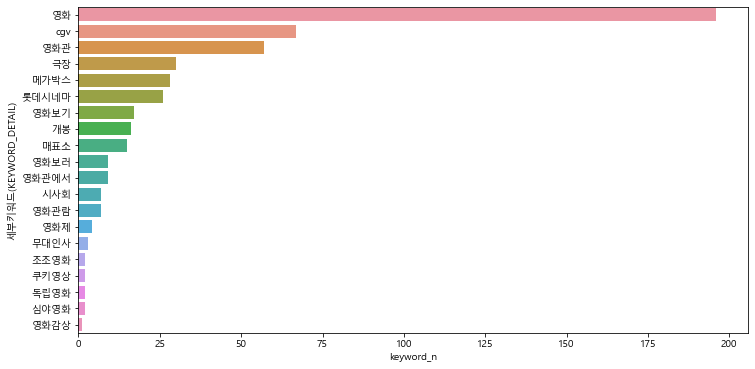

In [56]:

plt.figure(figsize = (12, 6))
sns.barplot(data = movie_KN, y = '세부키워드(KEYWORD_DETAIL)', x = 'keyword_n')

In [57]:
movie['keyword_n'] = movie_KN['keyword_n']

In [58]:
movie

,DOC_DATE(DATE),수집소스(SOURCE),행정동(DONG_NM),행정구(GU_NM),세부키워드(KEYWORD_DETAIL),FREQ(FREQ),keyword_n
0,20190625,블로그커뮤니티,샤로수길,서울,영화,1,67.0
1,20170731,블로그커뮤니티,가로수길,광진구,롯데시네마,1,16.0
2,20190731,블로그커뮤니티,송파,중구,영화,1,30.0
3,20180108,블로그커뮤니티,영등포역,송파구,영화관람,1,2.0
4,20170121,블로그커뮤니티,파르나스몰,마포구,영화관에서,1,26.0
...,...,...,...,...,...,...,...
495,20170615,블로그커뮤니티,월드컵경기장,중구,cgv,1,NaN
496,20181205,블로그커뮤니티,국립박물관,종로구,롯데시네마,1,NaN
497,20171025,블로그커뮤니티,신도림롯데시네마,은평구,영화관,2,NaN
498,20190901,블로그커뮤니티,이태원,중랑구,영화관람,2,NaN


In [77]:
movie_vcc = movie.groupby('행정구(GU_NM)', as_index=False).agg(movie_vc = ('행정구(GU_NM)','count'))
movie_vcc.sort_values('movie_vc', ascending=False)

,행정구(GU_NM),movie_vc
0,강남구,67
22,종로구,52
20,용산구,51
13,서울,44
11,마포구,43
23,중구,32
17,송파구,22
19,영등포구,21
5,광진구,20
14,서초구,18


In [60]:
movie['행정구언급량'] = movie_vcc['movie_vc']

In [61]:
movie['핫플'] = np.where(movie['행정구언급량'] >= 22, '핫플레이스',np.where(movie['행정구언급량'] >= 14, '로데오거리','한적한 곳'))

In [65]:
movie

,DOC_DATE(DATE),수집소스(SOURCE),행정동(DONG_NM),행정구(GU_NM),세부키워드(KEYWORD_DETAIL),FREQ(FREQ),keyword_n,행정구언급량,핫플
0,20190625,블로그커뮤니티,샤로수길,서울,영화,1,67.0,67.0,핫플레이스
1,20170731,블로그커뮤니티,가로수길,광진구,롯데시네마,1,16.0,9.0,한적한 곳
2,20190731,블로그커뮤니티,송파,중구,영화,1,30.0,5.0,한적한 곳
3,20180108,블로그커뮤니티,영등포역,송파구,영화관람,1,2.0,4.0,한적한 곳
4,20170121,블로그커뮤니티,파르나스몰,마포구,영화관에서,1,26.0,13.0,한적한 곳
...,...,...,...,...,...,...,...,...,...
495,20170615,블로그커뮤니티,월드컵경기장,중구,cgv,1,NaN,NaN,한적한 곳
496,20181205,블로그커뮤니티,국립박물관,종로구,롯데시네마,1,NaN,NaN,한적한 곳
497,20171025,블로그커뮤니티,신도림롯데시네마,은평구,영화관,2,NaN,NaN,한적한 곳
498,20190901,블로그커뮤니티,이태원,중랑구,영화관람,2,NaN,NaN,한적한 곳


In [73]:
movie1 = pd.merge(left = movie_vcc, right = movie, how = 'right',on='행정구(GU_NM)')

In [74]:
movie1

,행정구(GU_NM),movie_vc,DOC_DATE(DATE),수집소스(SOURCE),행정동(DONG_NM),세부키워드(KEYWORD_DETAIL),FREQ(FREQ),keyword_n,행정구언급량,핫플
0,서울,44,20190625,블로그커뮤니티,샤로수길,영화,1,67.0,67.0,핫플레이스
1,광진구,20,20170731,블로그커뮤니티,가로수길,롯데시네마,1,16.0,9.0,한적한 곳
2,중구,32,20190731,블로그커뮤니티,송파,영화,1,30.0,5.0,한적한 곳
3,송파구,22,20180108,블로그커뮤니티,영등포역,영화관람,1,2.0,4.0,한적한 곳
4,마포구,43,20170121,블로그커뮤니티,파르나스몰,영화관에서,1,26.0,13.0,한적한 곳
...,...,...,...,...,...,...,...,...,...,...
495,중구,32,20170615,블로그커뮤니티,월드컵경기장,cgv,1,NaN,NaN,한적한 곳
496,종로구,52,20181205,블로그커뮤니티,국립박물관,롯데시네마,1,NaN,NaN,한적한 곳
497,은평구,4,20171025,블로그커뮤니티,신도림롯데시네마,영화관,2,NaN,NaN,한적한 곳
498,중랑구,8,20190901,블로그커뮤니티,이태원,영화관람,2,NaN,NaN,한적한 곳


In [86]:
movie1

,행정구(GU_NM),DOC_DATE(DATE),수집소스(SOURCE),행정동(DONG_NM),세부키워드(KEYWORD_DETAIL),FREQ(FREQ),keyword_n,핫플,행정구언급량
0,서울,20190625,블로그커뮤니티,샤로수길,영화,1,67.0,핫플레이스,44
1,광진구,20170731,블로그커뮤니티,가로수길,롯데시네마,1,16.0,한적한 곳,20
2,중구,20190731,블로그커뮤니티,송파,영화,1,30.0,한적한 곳,32
3,송파구,20180108,블로그커뮤니티,영등포역,영화관람,1,2.0,한적한 곳,22
4,마포구,20170121,블로그커뮤니티,파르나스몰,영화관에서,1,26.0,한적한 곳,43
...,...,...,...,...,...,...,...,...,...
495,중구,20170615,블로그커뮤니티,월드컵경기장,cgv,1,NaN,한적한 곳,32
496,종로구,20181205,블로그커뮤니티,국립박물관,롯데시네마,1,NaN,한적한 곳,52
497,은평구,20171025,블로그커뮤니티,신도림롯데시네마,영화관,2,NaN,한적한 곳,4
498,중랑구,20190901,블로그커뮤니티,이태원,영화관람,2,NaN,한적한 곳,8
